<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Univariate_on_Company_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
company=pd.read_csv('/content/drive/MyDrive/FML/Company.csv')

In [ ]:
company.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

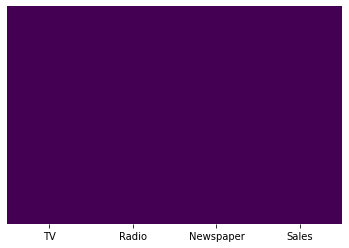

In [ ]:
sns.heatmap(company.isnull(),yticklabels=False,cbar=False,cmap="viridis")

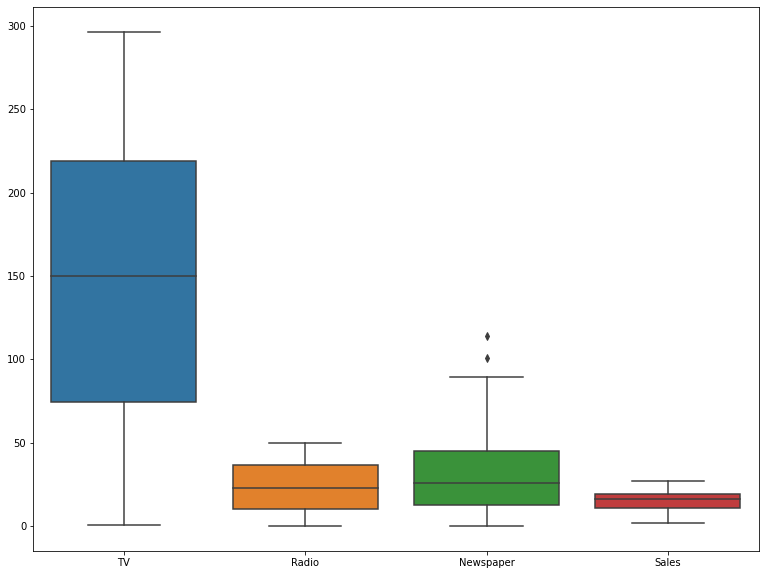

In [ ]:
# boxplot
# figsize to increse size of plot
plt.figure(figsize=(13,10))
sns.boxplot(company) 
plt.show()

In [ ]:
# finding quartiles q1 and q3 using "quantile" function 
# inter quartile range=q3-q1
q1=company["Newspaper"].quantile(0.25)
q3=company["Newspaper"].quantile(0.75)
inqr=q3-q1
print(inqr)

32.35


In [ ]:
# finding upper limit and lower limit
up_lim=q3+1.5*inqr
low_lim=q1-1.5*inqr
print(up_lim,low_lim)

93.625 -35.775000000000006


In [ ]:
# removing outliers
outliers=[]
Newspaper=company["Newspaper"]
for i in Newspaper:
  if(i>up_lim or i<low_lim):
    outliers.append(i)
print(outliers)


[114.0, 100.9]


In [ ]:
# inserting outliers as any measures of central tendency mean (or) median (or) mode
# updating newspaper coloumn
company["Newspaper"]=company["Newspaper"].replace(outliers,company["Newspaper"].mean())

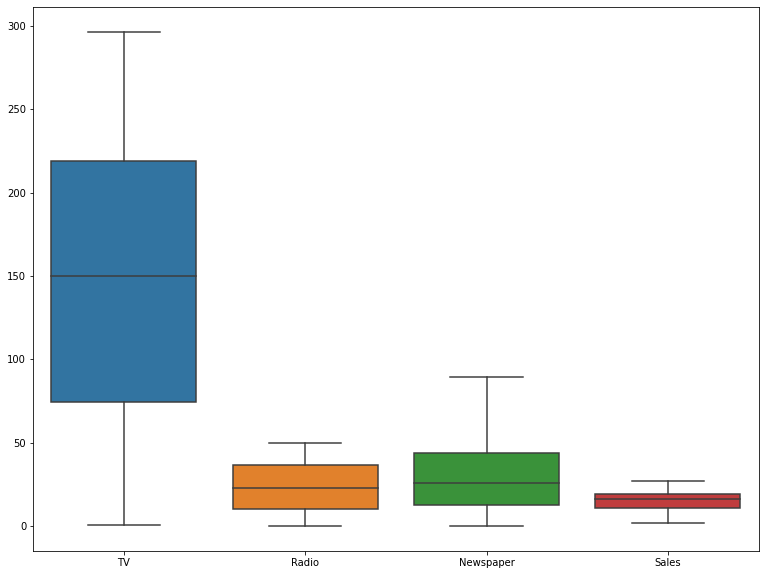

In [ ]:
# boxplot
# figsize to increse size of plot
plt.figure(figsize=(13,10))
sns.boxplot(company) 
plt.show()

In [53]:
# To find correlation
company.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.049440,0.901208
Radio,0.054809,1.000000,0.345313,0.349631
Newspaper,0.049440,0.345313,1.000000,0.150855
Sales,0.901208,0.349631,0.150855,1.000000


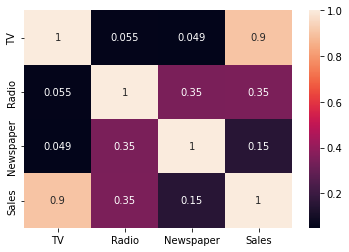

In [58]:
# To visualize clearly using heatmap
sns.heatmap(company.corr(),annot=True)
plt.show()

In [62]:
# From above map Tv and Sales are highly correlated So "TV" taken as X values through this we can get output Sales.
X=company['TV'].values
y=company['Sales'].values

In [63]:
X.shape,y.shape

((200,), (200,))

In [64]:
X=X.reshape(-1,1)
X.shape

(200, 1)

In [65]:
y=y.reshape(-1,1)
y.shape

(200, 1)

In [66]:
X.shape,y.shape

((200, 1), (200, 1))

In [68]:
# splitting data into training data and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

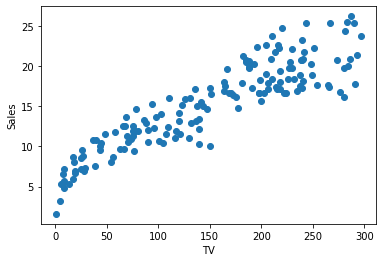

In [69]:
plt.scatter(X_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [71]:
reg.fit(X_train,y_train)

LinearRegression()

In [72]:
# training data
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict=reg.predict(X_train)
mae=mean_absolute_error(y_train,y_predict)
mse=mean_squared_error(y_train,y_predict)
rmse=np.sqrt(mean_squared_error(y_train,y_predict))
rs=r2_score(y_train,y_predict)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  1.8473223060765172
mse  5.234765531375338
rmse  2.2879609986569567
rs  0.813997555689372


In [73]:
# testing data
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict_test=reg.predict(X_test)
mae=mean_absolute_error(y_test,y_predict_test)
mse=mean_squared_error(y_test,y_predict_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict_test))
rs=r2_score(y_test,y_predict_test)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  1.7706783806719155
mse  5.188919224826998
rmse  2.2779199338051805
rs  0.802044847713428


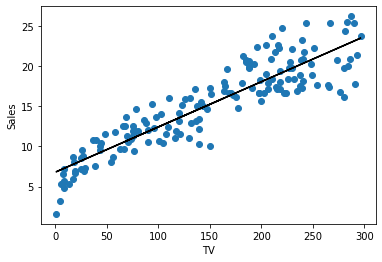

In [74]:
plt.scatter(X_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot(X_train,y_predict,color='black')
plt.show()